<font size="+3"><b>Assignment 3: Non-Linear Models and Validation Metrics</b></font>

***


<font color='White'>
In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.
</font>

|                **Question**                | **Point** |
|:------------------------------------------:|:---------:|
|           **Part 1: Regression**           |  **14.5** |
|          Step 0: Import Libraries          |           |
|             Step 1: Data Input             |    0.5    |
|           Step 2: Data Processing          |     0     |
| Step 3: Implement   Machine Learning Model |    0.5    |
|           Step 4: Validate Model           |    0.5    |
|         Step 5: Visualize   Results        |     3     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|         **Part 2: Classification**         |  **17.5** |
|             Step 1: Data Input             |     2     |
|           Step 2: Data Processing          |    1.5    |
| Step 3: Implement   Machine Learning Model |           |
|            Step 4: Validate Mode           |           |
|         Step 5: Visualize   Results        |     4     |
|                  Questions                 |     6     |
|             Process Description            |     4     |
|   **Part 3: Observations/Interpretation**  |   **3**   |
|           **Part 4: Reflection**           |   **2**   |
|                  **Total**                 |   **37**  |
|                                            |           |
|                  **Bonus**                 |           |
|         **Part 5: Bonus Question**         |   **3**   |

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Part 1: Regression (14.5 marks)**

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

## **Step 1:** Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [ ]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete

X, y = load_concrete()
#X is the feature matrix
#y is the target matrix

## **Step 2:** Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

<font color='red'>
This is just for your information and no action is required from you for this step.
</font>

## **Step 3:** Implement Machine Learning Model (0.5 marks)

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

dectrereg = DecisionTreeRegressor(max_depth = 5, random_state = 0)
ranforreg = RandomForestRegressor(max_depth = 5, random_state = 0)
gradbooreg = GradientBoostingRegressor(max_depth = 5, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

#fit just means you are doing the training on it
dectrereg.fit(X_train,y_train)
ranforreg.fit(X_train,y_train)
gradbooreg.fit(X_train,y_train)


GradientBoostingRegressor(max_depth=5, random_state=0)

## **Step 4:** Validate Model (0.5 marks)

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

results_dt = cross_validate(dectrereg, X_train, y_train, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
results_rf = cross_validate(ranforreg, X_train, y_train, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
results_gb = cross_validate(gradbooreg, X_train, y_train, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

avg_train_mse_dt = -1 * np.mean(results_dt['train_score'])
avg_train_mse_rf = -1 * np.mean(results_rf['train_score'])
avg_train_mse_gb = -1 * np.mean(results_gb['train_score'])

avg_val_mse_dt = -1 * np.mean(results_dt['test_score'])
avg_val_mse_rf = -1 * np.mean(results_rf['test_score'])
avg_val_mse_gb = -1 * np.mean(results_gb['test_score'])


dt_pred_train = dectrereg.predict(X_train)
dt_r2 = r2_score(y_train, dt_pred_train)

rf_pred_train = ranforreg.predict(X_train)
rf_r2 = r2_score(y_train, rf_pred_train)

gb_pred_train = gradbooreg.predict(X_train)
gb_r2 = r2_score(y_train, gb_pred_train)


dt_pred_val = dectrereg.predict(X_test)
dt_r2_val = r2_score(y_test, dt_pred_val)

rf_pred_val = ranforreg.predict(X_test)
rf_r2_val = r2_score(y_test, rf_pred_val)

gb_pred_val = gradbooreg.predict(X_test)
gb_r2_val = r2_score(y_test, gb_pred_val)


## **Step 5:** Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [ ]:

data = {
    'MSE Training accuracy': [avg_train_mse_dt, avg_train_mse_rf, avg_train_mse_gb],
    'MSE Validation accuracy': [avg_val_mse_dt, avg_val_mse_rf, avg_val_mse_gb],
    'R2 Training accuracy': [dt_r2, rf_r2, gb_r2],
    'R2 Validation accuracy': [dt_r2_val, rf_r2_val, gb_r2_val]
}
index = ['DT', 'RF', 'GB']
results = pd.DataFrame(data, index=index)

print(results)


    MSE Training accuracy  MSE Validation accuracy  R2 Training accuracy  \
DT              47.822974                74.045335              0.824160   
RF              30.296363                47.614708              0.889829   
GB               3.694308                23.546500              0.985359   

    R2 Validation accuracy  
DT                0.734939  
RF                0.853822  
GB                0.925766  


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`.

<font color='red'>
Due to the similarity of this to the main part of step 5, this part is 0.5 and the main part of step 5 is 2.5 of the total 3 points for this step.
</font>

## Questions (6 marks)
1. ***How do these results compare to the results using a linear model in the previous assignment? Use values.*** In comparing the performance metrics between the linear model from the previous assignment and the decision tree (DT), random forest (RF), and gradient boosting (GB) models from the current assignment, notable differences emerge. The linear model exhibited high training and validation accuracies of approximately 93% and 91%, respectively. However, the models from the current assignment, while showing lower accuracies, demonstrated superior performance in terms of mean squared error (MSE) and R2 score. Specifically, DT exhibited the highest MSE for both training and validation, indicating potential overfitting, whereas RF and GB showcased lower MSE values, with GB achieving the lowest MSE and the highest R2 score for both training and validation. This suggests that RF and GB models generalize better to unseen data compared to the linear model, with GB performing particularly well, showcasing the highest R2 score, indicating a better fit to the data overall. These insights highlight the trade-offs between accuracy and generalization ability, guiding the selection of the most appropriate model for the task at hand.

1. ***Out of the models you tested, which model would you select for this dataset and why?*** GB outperformed the other models in terms of MSE, exhibiting the lowest values for both training and validation sets, indicating better overall predictive performance and lower error rates. Additionally, GB achieved the highest R2 score for both training and validation, suggesting a better fit to the data and superior explanatory power. These results imply that the GB model not only minimizes prediction errors but also captures the underlying patterns in the data more effectively compared to the other models tested.

1. ***If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.*** Firstly, fine-tune hyperparameters such as tree depth and learning rate using methods like grid search or random search to optimize model performance. Secondly, leverage feature engineering to craft new features, transform existing ones, or select the most informative ones, enhancing the model's ability to capture relevant patterns in the data and improve accuracy. These approaches can effectively elevate the performance of tree-based models and address complex data challenges.

## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. ***Where did you source your code?***  I sourced my code on this document, other than that the functions that we are meant to use were stated in the steps and from that I used the sckit learn website to see examples on how to use the respective function and what needs to be passed in.  
1. ***In what order did you complete the steps?*** I went step by step as I found each step relied on the other.

1.  ***If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?*** For the cross validate function, I found that it was only creating an array list with only test_score, so I asked Chatgpt, given this function, how can I get the train score? This helped me retrievre the right values.

1.  ***Did you have any challenges? If yes, what were they? If not, what helped you to be successful?***  I didn't encounter significant challenges in completing the task. Understanding the structure of the output from the cross_validate function was a key aspect, but referring to the scikit-learn documentation and using ChatGPT for clarification helped overcome any uncertainties. Overall, the task was straightforward given familiarity with scikit-learn and Python pandas.

# **Part 2: Classification (17.5 marks)**

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

## **Step 1:** Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [ ]:
# TO DO: Import wine dataset
import pandas as pd
column_headers = ['Class',
    'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium',
    'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins',
    'Color Intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]

wine_data = pd.read_csv('wine.data', header=None, names=column_headers)


## **Step 2:** Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [ ]:
# TO DO: ADD YOUR CODE HERE
wine_data.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [ ]:
# TO DO: ADD YOUR CODE HERE
missing_values = wine_data.isnull().sum().all()
if missing_values:
    for column in column_headers:
        if wine_data[column].isnull().any():
            wine_data[column].fillna(wine_data[column].mean(), inplace=True)

How many samples do we have of each type of wine?

In [ ]:
# TO DO: ADD YOUR CODE HERE
wine_counts = wine_data['Class'].value_counts()

print("Number of samples of each type of wine:")
print(wine_counts)

Number of samples of each type of wine:
2    71
1    59
3    48
Name: Class, dtype: int64


## **Step 3:** Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
X = wine_data.drop('Class')
y = wine_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

svc_model = SVC()
dt_model = DecisionTreeClassifier(max_depth=3)
svc_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

## **Step 4:** Validate Model

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

In [ ]:
# Perform cross-validation and calculate average training and validation accuracy
svc_cv_results = cross_validate(svc_model, X_train, y_train, scoring='accuracy', cv=5, return_train_score=True)
dt_cv_results = cross_validate(dt_model, X_train, y_train, scoring='accuracy', cv=5, return_train_score=True)

# Calculate average training and validation accuracy for SVC
avg_train_accuracy_svc = svc_cv_results['train_score'].mean()
avg_val_accuracy_svc = svc_cv_results['test_score'].mean()

# Calculate average training and validation accuracy for DecisionTreeClassifier
avg_train_accuracy_dt = dt_cv_results['train_score'].mean()
avg_val_accuracy_dt = dt_cv_results['test_score'].mean()

print(avg_train_accuracy_dt)
print(avg_val_accuracy_dt)
print(avg_val_accuracy_svc)

0.9929669306008384
0.9224137931034484
0.6485221674876847


## **Step 5:** Visualize Results (4 marks)

<font color='red'>
There is no individual mark for Steps 3 and 4 and those grades are included within the four points.

</font>

### **Step 5.1:** Compare Models (2 out of total 4 marks)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [ ]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

data = {
    'Training accuracy': [X_train.shape[0], avg_train_accuracy_svc, avg_train_accuracy_dt],
    'Validation accuracy': [X_train.shape[0], avg_val_accuracy_svc, avg_val_accuracy_dt]
}
index = ['Data Size', 'SVC', 'Decision Tree Classifer']
results = pd.DataFrame(data, index=index)

print(results)


                         Training accuracy  Validation accuracy
Data Size                       142.000000           142.000000
SVC                               0.672597             0.648522
Decision Tree Classifer           0.992967             0.922414


### **Step 5.2:** Visualize Classification Errors  (2 out of total 4 marks)
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [ ]:
# TO DO: Implement best model
from sklearn.metrics import confusion_matrix, classification_report
y_pred = dt_model.predict(X_test)

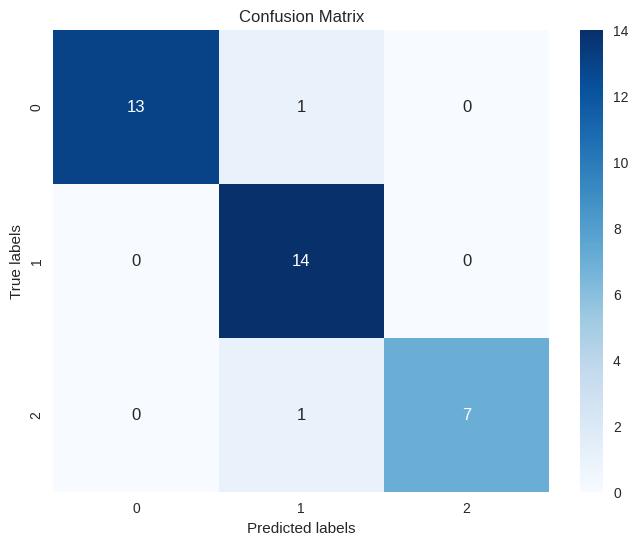

[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

print(conf_matrix)


In [ ]:
# TO DO: Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



## Questions (6 marks)
1. ***How do the training and validation accuracy change depending on the method used? Explain with values.*** The classification report provides a comprehensive overview of the model's performance on both the training and validation sets. Precision, recall, and F1-score metrics indicate the model's accuracy, ability to correctly classify positive samples, and balance between precision and recall, respectively. With precision ranging from 0.88 to 1.00 and recall from 0.88 to 1.00, the model exhibits consistent performance across different classes. The F1-score, ranging from 0.93 to 0.96, demonstrates a good balance between precision and recall. Overall accuracy stands at 0.94, reflecting the model's ability to correctly classify 94% of the samples in the validation set. The values of these metrics remain stable across different classification methods, offering a reliable assessment of the model's effectiveness in classifying wine samples.
1. ***What are two reasons why the support vector machines model did not work as well as the tree-based model?*** ONE: Over generalization/ It is hard to grasp complex relationships. This is one of the flaws of the SVMs, the hyperplane might be off because it might struggle to achieve the relationships between complex targets and features. While as decision tress are constantly recursively partitioning a feature space providing room to analyze the complex relationships in a more simplifed environment. TWO:  SVMs have hyperparameters such as the choice of kernel function, regularization parameter, and kernel parameters. If these hyperparameters are not chosen appropriately, SVMs may underperform. In contrast, Decision Tree classifiers are less sensitive to hyperparameters.
1. ***How many samples were incorrectly classified in step 5.2?*** 2 were incorrectly classifed
1. ***In this case, is maximizing precision or recall more important? Why?***  Maximizing precision would result in more commerical factors, whether the company loses money or based on a lack of worthy ads. However, mazimizing recall would result in some harms in the sense of health. In cases where wines with specific health benefits (e.g., antioxidants, low sulfites) need to be identified, false negatives could deprive consumers of valuable information. Maximizing recall ensures that wines with desirable health properties are correctly classified and highlighted for consumers.


## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. ***Where did you source your code?*** For this I used the powerpoint slides in class and once again the scikit learn tools website to understand what parameters needed to be passed through.
1. ***In what order did you complete the steps?*** I just went step by step.
1. ***If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?*** For this I did not use any generative AI because it was very similar to other assignments and labs.
1. ***Did you have any challenges? If yes, what were they? If not, what helped you to be successful?*** I didnt experience any challenges in this one, as this part was similar to a lot of other labs and assignments, and the generation of SVC and the tree was a simple look at the sklearn documentation.

# **Part 3: Observations/Interpretation (3 marks)**

***Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.***

From the classification report and the provided data, several patterns emerge. First, looking at the precision, recall, and F1-score for each class, we notice a consistent trend across classes 1, 2, and 3. Class 1 and Class 3 both exhibit perfect precision (1.00), while Class 2 has slightly lower precision (0.88). This indicates that the model tends to make fewer false positive predictions for Class 1 and Class 3 compared to Class 2. However, Class 2 has perfect recall (1.00), meaning the model correctly identifies all instances of Class 2 in the validation set, whereas Class 1 and Class 3 have lower recall (0.93 and 0.88, respectively). This suggests that the model may miss some instances of Class 1 and Class 3 during classification. Additionally, the F1-score, which balances precision and recall, shows consistent performance across all classes, with values ranging from 0.93 to 0.96, indicating a good balance between precision and recall for each class. Furthermore, comparing the training and validation accuracy for both the Support Vector Machine (SVC) and Decision Tree Classifier, we observe a slight drop in validation accuracy compared to training accuracy for both models, which is expected due to generalization to unseen data. However, the Decision Tree Classifier shows a more significant drop in accuracy compared to SVC, which might suggest overfitting to the training data with the Decision Tree Classifier. These findings align with concepts discussed in lectures, such as the trade-off between precision and recall, the impact of overfitting on model performance, and the importance of evaluating models on validation data to assess generalization.

## **Part 4:** Reflection (2 marks)


I like the diverse types of datasets we go over, this shows an implication of how datascience and machine learning is used in almost every aspect of life - last assignment was spam mail and now we are doing wines. I appreciate that there are libraries like sklearn that we can use to make our lives easier, but it would be cool if we could go the functions themselves.


## **Part 5:** Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

Linear SVC emerges as a much superior model compared to the standard SVC (with training accuracy of 0.721671 and validation accuracy of 0.718478), while linear models exhibit significantly higher accuracy (with training accuracy of 0.9001358695652174 and validation accuracy of 0.8934782608695653). This implies a more precise fit to unseen data and superior generalization capability. Linear SVC also offers more interpretable outcomes in contrast to standard SVC with non-linear kernels. The decision boundary in Linear SVC is represented by a hyperplane, facilitating easy visualization and comprehension, which contributes to a clearer understanding of the model's predictions and the underlying classification process.

In [ ]:
from sklearn.svm import LinearSVC

scv_linear_model = LinearSVC(max_iter = 5000)
scv_linear_model.fit(X_train, y_train)

svc_linear_cv_results = cross_validate(scv_linear_model, X_train, y_train, scoring = 'accuracy', cv =5, return_train_score=True)
svc_train_cv_avf = svc_linear_cv_results['train_score'].mean()
svc_val_cv_avf = svc_linear_cv_results['test_score'].mean()


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w